In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import statsmodels.api as sm
file = 'fatty.csv'
df = pd.read_csv(file)
df.head()
df.describe()
#imports file + describes file

,YEAR,AGE,NETWORTH
count,238880.000000,238880.000000,2.388800e+05
mean,2004.196542,50.961232,9.378397e+06
std,8.523608,16.219296,5.050908e+07
min,1989.000000,17.000000,-2.340803e+08
25%,1998.000000,39.000000,2.322932e+04
50%,2004.000000,50.000000,2.080907e+05
75%,2013.000000,63.000000,1.351380e+06
max,2016.000000,95.000000,2.928346e+09


In [2]:
df['YEAR'] = pd.to_numeric(df['YEAR'])
after_50_df = df[df['YEAR'] >= 1989]
after_50_before_60_df = after_50_df[after_50_df['YEAR']<1993]
min_year = after_50_before_60_df['YEAR'].min()
max_year = after_50_before_60_df['YEAR'].max()
print(min_year, max_year)
#sorting year

1989 1992


In [3]:
df['AGE'] = pd.to_numeric(df['AGE'])
low_age = df[df['AGE'] >= 18]
low_age_high_age = low_age[low_age['AGE']<=22]
min_year = low_age_high_age['AGE'].min()
max_year = low_age_high_age['AGE'].max()
print(min_year, max_year)
#sorts age

18 22


In [15]:
print(list(low_age_high_age))
print(len(low_age_high_age))
print(len(list(low_age_high_age)))
low_age_high_age.head()
#age data

['YEAR', 'AGE', 'NETWORTH']
4884
3


,YEAR,AGE,NETWORTH
50,1989,21,0.0
51,1989,21,0.0
52,1989,21,0.0
53,1989,21,0.0
54,1989,21,0.0


In [5]:
print(list(after_50_before_60_df))
print(len(after_50_before_60_df))
print(len(list(after_50_before_60_df)))
#prints info abouyt data

['YEAR', 'AGE', 'NETWORTH']
35245
3


In [6]:
low_age_high_age.describe()
#describes data 

,YEAR,AGE,NETWORTH
count,4884.000000,4884.000000,4.884000e+03
mean,2003.651106,20.763718,7.120479e+04
std,8.222727,1.174977,9.027431e+05
min,1989.000000,18.000000,-2.219350e+05
25%,1998.000000,20.000000,-3.018700e+02
50%,2004.000000,21.000000,3.203595e+03
75%,2010.000000,22.000000,1.417123e+04
max,2016.000000,22.000000,2.398071e+07


In [7]:
after_50_before_60_df.describe()
#describes the data

,YEAR,AGE,NETWORTH
count,35245.000000,35245.000000,3.524500e+04
mean,1990.662363,50.470279,5.843459e+06
std,1.491208,16.427610,3.499148e+07
min,1989.000000,18.000000,-3.965421e+07
25%,1989.000000,37.000000,3.417866e+04
50%,1992.000000,49.000000,2.104130e+05
75%,1992.000000,63.000000,1.280911e+06
max,1992.000000,95.000000,2.928346e+09


In [8]:
#first 5 terms of data
after_50_before_60_df.head()

,YEAR,AGE,NETWORTH
0,1989,35,2201.71
1,1989,35,2406.96
2,1989,35,2033.79
3,1989,35,2052.45
4,1989,35,2257.69


,YEAR,AGE,NETWORTH
count,35245.000000,35245.000000,3.524500e+04
mean,1990.662363,50.470279,5.843459e+06
std,1.491208,16.427610,3.499148e+07
min,1989.000000,18.000000,-3.965421e+07
25%,1989.000000,37.000000,3.417866e+04
50%,1992.000000,49.000000,2.104130e+05
75%,1992.000000,63.000000,1.280911e+06
max,1992.000000,95.000000,2.928346e+09


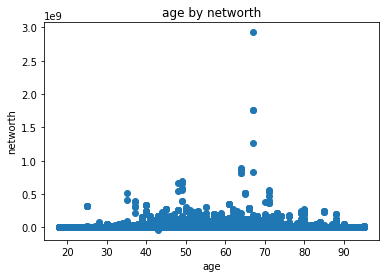

In [9]:
x = 'AGE'
y = 'NETWORTH'
plt.scatter(x = after_50_before_60_df[x], y = after_50_before_60_df[y])
plt.xlabel('age')
plt.ylabel('networth')
plt.title('age by networth')
after_50_before_60_df.describe()
#scatter graph per year

   Year    std
0  1992  3.500
1  1998  3.800
2  2004  4.700
3  2010  5.500
4  2016  6.188


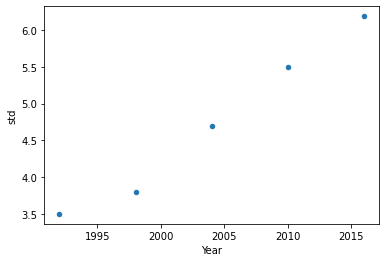

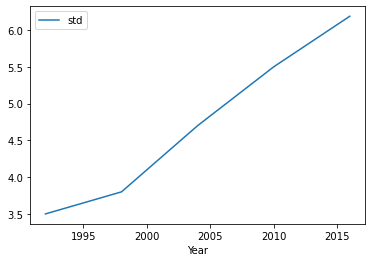

The parameters of the curve: [ 1.17933333e-01 -2.31600800e+02]


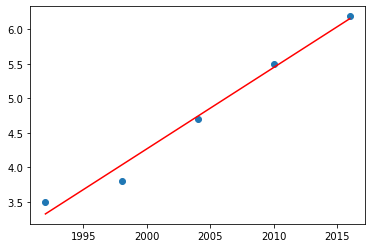

In [10]:
Year = [1992, 1998, 2004, 2010, 2016]
std = [3.5, 3.8, 4.7, 5.5, 6.188]
df = pd.DataFrame(list(zip(Year, std)),
               columns =['Year', 'std'])
print(df)
df.plot(kind='scatter', y='std', x='Year')
df.plot(kind='line', y='std', x='Year')
plt.xlabel('Year')
plt.ylabel('')
plt.show()
X = df['Year']
y = df['std']


theta = np.polyfit(X, y, 1)

print(f'The parameters of the curve: {theta}')


y_line=theta[1] + theta[0] * X

plt.scatter(X, y)
plt.plot(X, y_line, 'r')
#graphs to show standard deviation of wealth inequality over the years